## Geoserver rest API
* Useful link: curl to requests at https://curl.trillworks.com/
* Server running at http://localhost:8080/geoserver

First demo a get with CURL following [the basic docs](https://docs.geoserver.org/latest/en/user/rest/api/details.html). Note that `Content-type` can be XML, JSON, ZIP amonst others.

First in XML

In [1]:
!curl -u admin:geoserver -XGET -H "Accept: text/xml" http://localhost:8080/geoserver/rest/about/version.xml

<about>
  <resource name="GeoServer">
    <Build-Timestamp>21-Sep-2018 20:18</Build-Timestamp>
    <Version>2.14.0</Version>
    <Git-Revision>2ecf6413b0d5d304c7dc23d8d7e9f3cfad29f37c</Git-Revision>
  </resource>
  <resource name="GeoTools">
    <Build-Timestamp>21-Sep-2018 16:31</Build-Timestamp>
    <Version>20.0</Version>
    <Git-Revision>ffc271f317c04e714ea44a4879dd4601bd723d5e</Git-Revision>
  </resource>
  <resource name="GeoWebCache">
    <Version>1.14.0</Version>
    <Git-Revision>1.14.x/775e94eb2ae59dd9b74aecc709b67d7b968a4317</Git-Revision>
  </resource>
</about>

Alternatively using json

In [2]:
!curl -u admin:geoserver -XGET -H "Accept: text/json" http://localhost:8080/geoserver/rest/about/version.json

{"about":{"resource":[{"@name":"GeoServer","Build-Timestamp":"21-Sep-2018 20:18","Version":"2.14.0","Git-Revision":"2ecf6413b0d5d304c7dc23d8d7e9f3cfad29f37c"},{"@name":"GeoTools","Build-Timestamp":"21-Sep-2018 16:31","Version":20,"Git-Revision":"ffc271f317c04e714ea44a4879dd4601bd723d5e"},{"@name":"GeoWebCache","Version":"1.14.0","Git-Revision":"1.14.x\/775e94eb2ae59dd9b74aecc709b67d7b968a4317"}]}}

Now use requests

In [10]:
import requests

headers = {
    'Accept': 'text/json',
}

username = 'admin'
password = 'geoserver'
auth = requests.auth.HTTPBasicAuth(username, password)

url = "http://localhost:8080/geoserver/rest/about/version.json"
response = requests.get(url, headers=headers, auth=auth)

In [11]:
response.json()

{'about': {'resource': [{'@name': 'GeoServer',
    'Build-Timestamp': '21-Sep-2018 20:18',
    'Version': '2.14.0',
    'Git-Revision': '2ecf6413b0d5d304c7dc23d8d7e9f3cfad29f37c'},
   {'@name': 'GeoTools',
    'Build-Timestamp': '21-Sep-2018 16:31',
    'Version': 20,
    'Git-Revision': 'ffc271f317c04e714ea44a4879dd4601bd723d5e'},
   {'@name': 'GeoWebCache',
    'Version': '1.14.0',
    'Git-Revision': '1.14.x/775e94eb2ae59dd9b74aecc709b67d7b968a4317'}]}}

In [12]:
[resource['@name'] for resource in response.json()['about']['resource']]

['GeoServer', 'GeoTools', 'GeoWebCache']

## Settings
Get the geoserver `settings`

In [21]:
url = "http://localhost:8080/geoserver/rest/settings.json"
settings = requests.get(url, headers=headers, auth=auth).json()
settings

{'global': {'settings': {'id': 'SettingsInfoImpl-68f6c583:154ca420c47:-8000',
   'contact': {'addressCity': 'Alexandria',
    'addressCountry': 'Egypt',
    'addressType': 'Work',
    'contactEmail': 'claudius.ptolomaeus@gmail.com',
    'contactOrganization': 'Squibbers',
    'contactPerson': 'Rob',
    'contactPosition': 'Chief Geographer'},
   'charset': 'UTF-8',
   'numDecimals': 8,
   'onlineResource': 'http://geoserver.org',
   'verbose': False,
   'verboseExceptions': False,
   'localWorkspaceIncludesPrefix': False},
  'jai': {'allowInterpolation': False,
   'recycling': False,
   'tilePriority': 5,
   'tileThreads': 7,
   'memoryCapacity': 0.5,
   'memoryThreshold': 0.75,
   'imageIOCache': False,
   'pngAcceleration': True,
   'jpegAcceleration': True,
   'allowNativeMosaic': False,
   'allowNativeWarp': False},
  'coverageAccess': {'maxPoolSize': 10,
   'corePoolSize': 5,
   'keepAliveTime': 30000,
   'queueType': 'UNBOUNDED',
   'imageIOCacheThreshold': 10240},
  'updateSeque

## Workspaces
* A `workspace` is a grouping of data stores.
* [Workspaces endpoint description](https://docs.geoserver.org/2.13.2/user/rest/api/workspaces.html)

In [14]:
url = "http://localhost:8080/geoserver/rest/workspaces.json"
workspaces = requests.get(url, headers=headers, auth=auth).json()
workspaces

{'workspaces': {'workspace': [{'name': 'cite',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/cite.json'},
   {'name': 'tiger',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/tiger.json'},
   {'name': 'nurc',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/nurc.json'},
   {'name': 'sde',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/sde.json'},
   {'name': 'it.geosolutions',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/it.geosolutions.json'},
   {'name': 'topp',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/topp.json'},
   {'name': 'sf',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/sf.json'},
   {'name': 'ncy_roads',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/ncy_roads.json'}]}}

In [19]:
workspaces = [workspace['name'] for workspace in workspaces['workspaces']['workspace']]
workspaces

['cite', 'tiger', 'nurc', 'sde', 'it.geosolutions', 'topp', 'sf', 'ncy_roads']

In [20]:
print(f"There are { len(workspaces) } workspaces")

There are 8 workspaces


## Namespaces
* A `namespace` is a uniquely identifiable grouping of feature types
* [List namespaces](https://docs.geoserver.org/2.13.2/user/rest/api/namespaces.html)

In [43]:
url = "http://localhost:8080/geoserver/rest/namespaces.json"
namespaces = requests.get(url, headers=headers, auth=auth).json()
namespaces

{'namespaces': {'namespace': [{'name': 'cite',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/cite.json'},
   {'name': 'tiger',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/tiger.json'},
   {'name': 'nurc',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/nurc.json'},
   {'name': 'sde',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/sde.json'},
   {'name': 'it.geosolutions',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/it.geosolutions.json'},
   {'name': 'topp',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/topp.json'},
   {'name': 'sf',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/sf.json'},
   {'name': 'ncy_roads',
    'href': 'http://localhost:8080/geoserver/rest/namespaces/ncy_roads.json'}]}}

In [44]:
namespaces = [space['name'] for space in namespaces['namespaces']['namespace']]
namespaces

['cite', 'tiger', 'nurc', 'sde', 'it.geosolutions', 'topp', 'sf', 'ncy_roads']

In [45]:
print(f"There are { len(namespaces) } namespaces")

There are 8 namespaces


## Data stores
* A `data store` contains **vector format spatial data** (i.e. tabular data). It can be a file (such as a shapefile), a database (such as PostGIS), or a server
* [List all datastores in a workspace](https://docs.geoserver.org/2.13.2/user/rest/api/datastores.html)

In [47]:
workspace = 'ncy_roads'
url = f"http://localhost:8080/geoserver/rest/workspaces/{workspace}/datastores.json"
print(url)
data_stores = requests.get(url, headers=headers, auth=auth).json()
data_stores

http://localhost:8080/geoserver/rest/workspaces/ncy_roads/datastores.json


{'dataStores': {'dataStore': [{'name': 'NYC Roads',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/ncy_roads/datastores/NYC+Roads.json'},
   {'name': 'nyc_buildings',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/ncy_roads/datastores/nyc_buildings.json'}]}}

In [48]:
data_stores = [store['name'] for store in data_stores['dataStores']['dataStore']]
data_stores

['NYC Roads', 'nyc_buildings']

## Coverage stores
* A coverage store contains raster format spatial data.
* [API](https://docs.geoserver.org/2.13.2/user/rest/api/coveragestores.html)

In [50]:
workspace = 'ncy_roads'
url = f"http://localhost:8080/geoserver/rest/workspaces/{workspace}/coveragestores.json"
coverage_stores = requests.get(url, headers=headers, auth=auth).json()
coverage_stores

{'coverageStores': {'coverageStore': [{'name': 'my geotiff',
    'href': 'http://localhost:8080/geoserver/rest/workspaces/ncy_roads/coveragestores/my+geotiff.json'}]}}

Get a particular store

In [52]:
cs = 'my geotiff'
url = f"http://localhost:8080/geoserver/rest/workspaces/{workspace}/coveragestores/{cs}.json"
my_store = requests.get(url, headers=headers, auth=auth).json()
my_store

{'coverageStore': {'name': 'my geotiff',
  'description': 'bla',
  'type': 'GeoTIFF',
  'enabled': True,
  'workspace': {'name': 'ncy_roads',
   'href': 'http://localhost:8080/geoserver/rest/workspaces/ncy_roads.json'},
  '_default': False,
  'url': 'file:///Users/robincole/Pictures/earth-i-milton-keynes-l1a/PAN/TRIPLESAT_1_PAN_L1_20160506094728_000443VI_020_20160630009001_001001_browser.tif',
  'coverages': 'http://localhost:8080/geoserver/rest/workspaces/ncy_roads/coveragestores/my geotiff/coverages.json'}}

In [54]:
my_store['coverageStore']['url']

'file:///Users/robincole/Pictures/earth-i-milton-keynes-l1a/PAN/TRIPLESAT_1_PAN_L1_20160506094728_000443VI_020_20160630009001_001001_browser.tif'

Lets now display the image

In [56]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
# use rasterio to read in the satellite image
my_tiff = rasterio.open(my_store['coverageStore']['url'])

In [60]:
my_tiff.bounds

BoundingBox(left=-0.7920114040565439, bottom=52.01779873653884, right=-0.7124811042823662, top=52.066756904948214)

In [61]:
my_tiff.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 372,
 'height': 229,
 'count': 1,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': Affine(0.00021379112842520888, 0.0, -0.7920114040565439,
        0.0, -0.00021379112842520888, 52.066756904948214)}

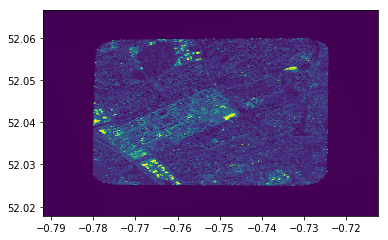

In [58]:
show(my_tiff, cmap='viridis');

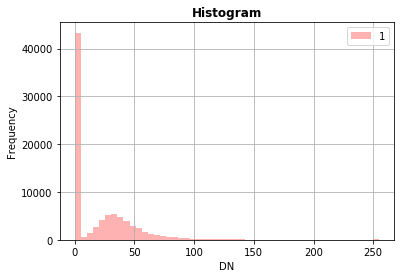

In [62]:
show_hist(my_tiff, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

# Post to Geoserver
Lets now post some data to Geoserver. The [Geoserver rest examples](https://docs.geoserver.org/latest/en/user/rest/api/index.html) give some advice

Using requests files are posted like:
```python
url = 'https://httpbin.org/post'
files = {'file': open('report.xls', 'rb')}

r = requests.post(url, files=files)
>>> r.text
```